# Intégration

L'intégration peut être vue comme l'opération inverse de la différentiation. C'est à peu près ça, sauf que l'intégration est plutôt la solution d'une équation différentielle, qui seront vue plus tard. Ici, on définit l'intégration à l'aide de son élément de base, l'intégrale, on en définit quelques propriétés importantes, pour en donner une représentation numérique approchée.

In [1]:
import matplotlib.pyplot as plt

## Definition

L'intégrale généralise la somme pour des fonctions continues, c'est-à-dire des fonctions que l'on connaît pour n'importe quel point. Là où on pouvait faire la somme sur l'ensemble des points connus de $f_{i}$ pour un ensemble de $i$ donnés et entier (une séquence donc), on peut maintenant associer une valeur $f\left(x\right)$ à n'importe quel $x$, et il y a une infinité possible de ces $x$. On doit donc inventer la possibilité de lisser la droite, sous la forme de l'élément infinitésimal $dx$, qui correspond à la densité de ces points $x$. On a donc la transition conceptuelle suivante 

$$
\sum_{i=1}^{N} f_i \rightarrow \int_{a}^{b} f\left(x\right) dx
$$

à laquelle on s'intéresse maintenant. Ce problème ayant été résolu par Riemann, la notion d'intégrale sous-jacente est l'[intégrale de Riemann](https://fr.wikipedia.org/wiki/Int%C3%A9grale_de_Riemann).

Le point le plus important de cette note est de réaliser que l'intégrale d'une fonction représente l'aire sous la courbe de cette intégrale.

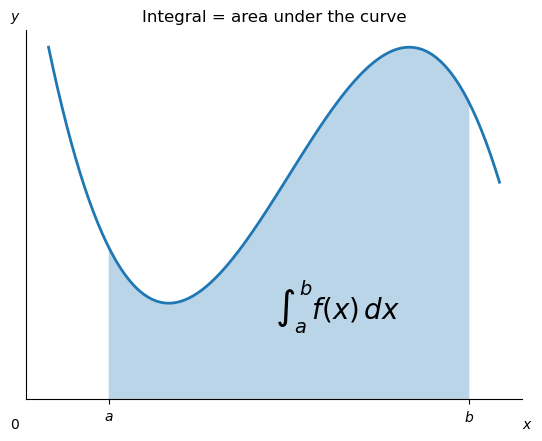

<Figure size 640x480 with 0 Axes>

In [2]:
f = lambda x: 3*x**2/2 - x**3/4
F = lambda x: x**3/2 - x**4/16

xmin, xmax = -2, 5.5
a, b = -1, 5
nb_points = 100

x = [xmin + (xmax-xmin)*t/nb_points
     for t in range(nb_points+1)]
xab = [a + (b-a)*t/nb_points
       for t in range(nb_points+1)]
    
fig, ax = plt.subplots()
ax.fill_between(xab,
                [f(x)+3 for x in xab],
                [0 for x in xab],
                alpha=.3, linewidth=0)
ax.plot(x, [f(x)+3 for x in x],
        linewidth=2)
title = f"Integral = area under the curve"
ax.text(2.8, 2.5, r"$\int_{a}^{b} f(x)\,dx$",
        horizontalalignment='center', fontsize=20)
ax.set_title(title)
ax.set_ylim(bottom=0)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([a, b], labels=['$a$', '$b$'])
ax.set_yticks([])
fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')
fig.text(0.1, 0.05, '$0$')
plt.show()
plt.clf()

## Intégration au sens de Riemann

On va calculer l'aire sous la fonction $f\left(x\right)$ entre les points $x=a$ et $x=b$ en faisant la somme de rectangles de la fonction entre ces points. On prend donc

 - $N+1$ points $x_i$ tels que $x_0 = a$, $x_N = b$ et $x_0 < x_1 < x_2 < \cdots < x_N$ 
 - $N$ points $t_i \in \left[x_i , x_{i+1}\right]$ dans les sous-intervales ainsi constitués

alors on définit l'intégrale (au sens de Riemann) comme la somme lorsque $N$ tend vers l'infini de la somme des $f\left(t_i \right)$ : 

$$
\int_{a}^{b} f\left(x\right) \,dx = \lim_{N\rightarrow \infty} \sum_{i=1}^{N} f\left(t_i\right) \left( x_{i+1} - x_{i} \right) 
$$

L'animation ci-dessous construit cette intégration en prenant les points $t_i$ au milieu des sous-intervales pris régulièrement. Cela n'est pas nécessaire dans le cadre de l'intégration au sens de Riemann : il suffit de prendre des intervales possiblement irrégulier, et des points quelconques dans ces sous-intervales. Si on prend les points $t_i$ au milieu des sous-intervales régulier, on réalise l'intégration numérique par la méthode des rectangles.

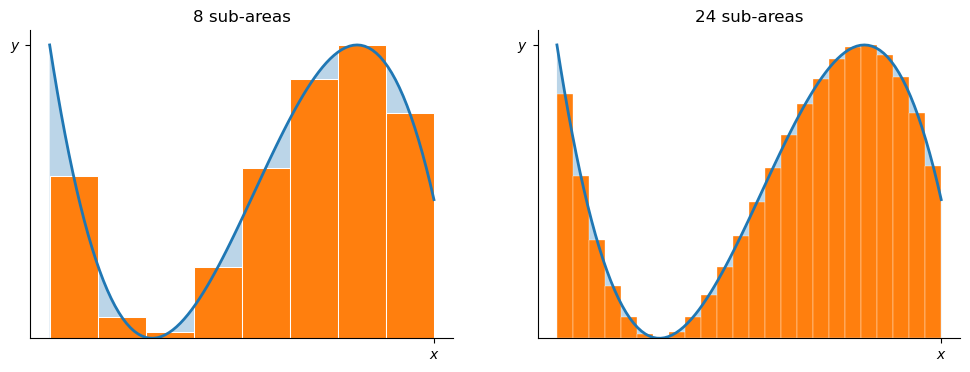

<Figure size 640x480 with 0 Axes>

In [3]:
f = lambda x: 3*x**2/2 - x**3/4
F = lambda x: x**3/2 - x**4/16

xmin, xmax = -2, 5.5
nb_points = 100
nb_rectangles = 4

def plot_rectangle(ax,
                   nb_rectangles=nb_rectangles):
    x = [xmin + (xmax-xmin)*t/nb_points
         for t in range(nb_points+1)]
    t = [xmin + (xmax-xmin)/nb_rectangles/2 + (xmax-xmin)*t/nb_rectangles
         for t in range(nb_rectangles)]
    width = (xmax-xmin)/nb_rectangles
    ax.fill_between(x,
                    [f(x) for x in x],
                    [0 for x in x],
                    alpha=.3, linewidth=0)
    ax.plot(x, [f(x) for x in x],
            linewidth=2)
    ax.bar(t, [f(t) for t in t],
           width=width,
           edgecolor="white",
           linewidth=8*width/10)
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xticks([xmax], labels=[r'$x$'])
    ax.set_yticks([f(xmin)], labels=[r'$y$'])
    ax.set_title(f"{nb_rectangles} sub-areas")
    return ax

fig, axs = plt.subplots(1, 2, figsize=(12,4))
for i, nb_rectangles in enumerate([8, 24]):
    axs[i] = plot_rectangle(axs[i], nb_rectangles = nb_rectangles)
fig.title = "Riemann integration"
plt.show()
plt.clf()

## Théorême fondamental de l'analyse

Le [théorème fondamental de l'analyse](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_fondamental_de_l'analyse) relie les notions de dérivée et d'intégrale. Il dit essentiellement que l'opération d'intégration est l'inverse de l'opération de dérivation 

```{admonition} Théorème fondamental de l'analyse
:class: hint
Si $F$ est différentiable sur $\left[a, b\right]$ alors, pour tout $x$ dans $\left[a, b\right]$, $F^{\prime}$ est intégrable sur $\left[a, x\right]$

$$
\int_a^x F^{\prime}(u)\, du = F(x)-F(a)
$$

pour démontrer ce résultat (que l'on considèrera acquis), il faut utiliser des intégrales plus générales que l'intégrale de Riemann, voir par exemple l'[intégrale de Lebesgue](https://fr.wikipedia.org/wiki/Int%C3%A9grale_de_Lebesgue) et de l'[intégrale de Kurweil-Henstock](https://fr.wikipedia.org/wiki/Int%C3%A9grale_de_Kurzweil-Henstock)
```

## Propriétés

La principale propriété de l'intégrale de Riemann est la linéarite

$$
\int_a^b \left(\alpha f + \beta g\right)(x) \, dx = \alpha \int_a^b f\left(x\right) \,dx + \beta \int_a^b g\left(x\right) \, dx
$$

pour tout $\alpha$ et $\beta$ réel (et donc indépendant de $x$). En considérant les intégrales comme des aires, cette propriété se démontre instantanément. On peut s'en servir de définiton de l'intégrale comme [opération duale de la dérivation](https://fr.wikipedia.org/wiki/Forme_diff%C3%A9rentielle).

L'autre propriété essentielle est la [relation de Chasles](https://fr.wikipedia.org/wiki/Int%C3%A9gration_(math%C3%A9matiques)#Relation_de_Chasles), qui permet de calculer une intégrale sur un intervale comme une somme d'intégrales prises sur des sous-intervales contigüs.

$$
\int_{a}^{b}f\left(x\right)\,dx=\int_{a}^{c}f\left(x\right)\,dx+\int_{c}^{b}f\left(x\right)\,dx
$$

![Relation de Chasles](img/chasles.png)

Une fois encore, cette propriétés est une application directe de la notion d'aire sous la courbe.